<a href="https://colab.research.google.com/github/luisleonb/Proyecto-Modulo-5-ABP/blob/main/Proyecto_M5_Luis_Le%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Módulo 5: Análisis estadístico sobre hábitos saludables en jóvenes universitarios

Luis León Barrera

##Lección 1: Método Científico y Estadística



###1. Definición del problema a investigar:

Se busca analizar factores que influyen en los hábitos saludables en jóvenes universitarios, con foco en la actividad física. Se quiere ***evaluar si el promedio de minutos de actividad física semanal es menor que la recomendación de 150 minutos establecida por guías de salud.***

###2. Formulación de Hipótesis:


*   Hipótesis Nula $H_0$: Los jóvenes universitarios en hacen al menos 150 minutos de actividad física a la semana.
*   Hipótesis Alternativa $H_1$: Los jóvenes hacen menos de 150 de actividad física a la semana.

En notación estadística:
*   $H_0$: $\mu$ $\ge$  150
*   $H_1$: $\mu$ $<$  150

###3. Identificación de variables:
#### 3.1. Variables cuantitativas:
* **Actividad física semanal**: tiempo total en minutos dedicado al ejercicio por semana. Variable *continua*.
* **Horas de sueño**: promedio de horas dormidas durante la semana. Variable *continua*.
* **Edad del estudiante**: edad del estudiante al momento del estudio (en años). Variable *discreta*.
* **Consumo de agua**: litros de agua ingerida diariamente por el estudiante. Variable *continua*.

#### 3.2. Variables cualitativas:
* **Género**: Masculino, Femenino, Otro. *Nominal*
* **Carrera**: Área de estudio (ingenieria, salud, artes, etc.). *Nominal*
* **Nivel de estrés percibido**: Bajo, medio, alto. *Ordinal*
* **Frecuencia de consumo comida rápida**: Nunca, 1-2 veces por semana, +3 veces por semana. *Ordinal*
* **Calidad del sueño**: Buena, regular, mala. *Ordinal*

##4. Enfoque metodológico elegido
Para el desarrollo de este proyecto se trabajará con un enfoque cuantitativo con apoyo de variables cualitativas. Este enfoque permite medir numéricamente los hábitos saludables (por ejemplo, minutos de actividad física, horas de sueño) y, al mismo tiempo, relacionarlos con variables categóricas como género, carrera o nivel de estrés, facilitando el análisis estadístico posterior.

Se aplicará el método científico deductivo con un enfoque cuantitativo. Este proceso iniciará con la observación de la problemática de salud estudiantil, seguida por la formulación de hipótesis contrastables ($H_0$ y $H_1$). La fase de experimentación se sustituirá por una simulación de datos rigurosa y un análisis estadístico inferencial para validar o rechazar las premisas iniciales, asegurando la objetividad en las conclusiones.

##5. Diseño preliminar del estudio
* **Población objetivo**: jóvenes universitarios de distintas carreras de una universidad.
* **Tipo de estudio**: observacional, transversal.
* **Técnica de muestreo**: se propone un muestreo aleatorio simple, con una muestra de al menos 100 estudiantes.
  *  Para efectos de este proyecto se realizará una simulación de datos utilizando la librería pandas en Python, respetando las características definidas para cada variable.

##Lección 2: Probabilidad y Estadística

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_estudiantes = 100

data = {
    'minutos_ejercicio': np.random.normal(142, 30, n_estudiantes).clip(0),
    'horas_sueño': np.random.normal(7, 2, n_estudiantes).clip(0,24),
    'edad': np.random.randint(18,25, n_estudiantes),
    'consumo_agua': np.random.normal(3, 1, n_estudiantes).clip(0.5),
    'nivel_estres': np.random.choice(['Bajo', 'Medio', 'Alto'], n_estudiantes, p=[0.2, 0.5, 0.3]),
    'carrera': np.random.choice(['Ingeniería', 'Salud', 'Artes', 'Leyes'], n_estudiantes, p=[0.3, 0.3, 0.1, 0.3]),
    'genero': np.random.choice(['Masculino', 'Femenino', 'Otro'], n_estudiantes, p=[0.45, 0.50, 0.05]),
    'frecuencia_comida_rapida': np.random.choice(['Nunca', '1-2 veces por semana', '+3 veces por semana'], n_estudiantes, p=[0.3, 0.4, 0.3]),
    'calidad_sueño': np.random.choice(['Buena', 'Regular', 'Mala'], n_estudiantes, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(data)
df.describe()

,minutos_ejercicio,horas_sueño,edad,consumo_agua
count,100.000000,100.000000,100.000000,100.000000
mean,138.884604,7.044609,21.040000,3.099692
std,27.245053,1.907338,2.073985,1.099784
min,63.407647,3.162458,18.000000,0.500000
25%,123.972830,5.388679,19.000000,2.409540
50%,138.191311,7.168214,21.000000,3.142030
75%,154.178562,8.076341,23.000000,3.886898
max,197.568346,12.440338,24.000000,6.187033


In [2]:
#Guardado de dataset en csv
df.to_csv('datos_estudiantes.csv', index=False)

Eventos aleatorios:

* Evento A: Estudiante sedentario -> minutos_ejercicio < 150
* Evento B: Estrés alto -> nivel_estres = alto

Se buscará calcular la P(A), P(B), P(A $\cap$ B), P(A $\cup$ B)


Justificación del Muestreo

* Método: Muestreo Aleatorio Simple (MAS).
* Justificación: Se seleccionó este método para asegurar que cada individuo de la población universitaria tenga la misma probabilidad de ser incluido en la muestra. Dado que la simulación utiliza np.random, garantizamos la independencia de las observaciones, requisito fundamental para aplicar el Teorema del Límite Central en etapas posteriores.

In [3]:
#Probabilidad de A
p_a = (df['minutos_ejercicio'] < 150).mean()

#Probabilidad de B
p_b = (df['nivel_estres'] == 'Alto').mean()

#Probabilidad A inter B
p_ayb = ((df['minutos_ejercicio'] < 150) & (df['nivel_estres'] == 'Alto')).mean()

#Probabilidad de A unión B
p_aub = p_a + p_b - p_ayb

print(f"P(A): {p_a:.2f}")
print(f"P(B): {p_b:.2f}")
print(f"P(A ∩ B): {p_ayb:.2f}")
print(f"P(A ∪ B): {p_aub:.2f}")

P(A): 0.65
P(B): 0.27
P(A ∩ B): 0.21
P(A ∪ B): 0.71


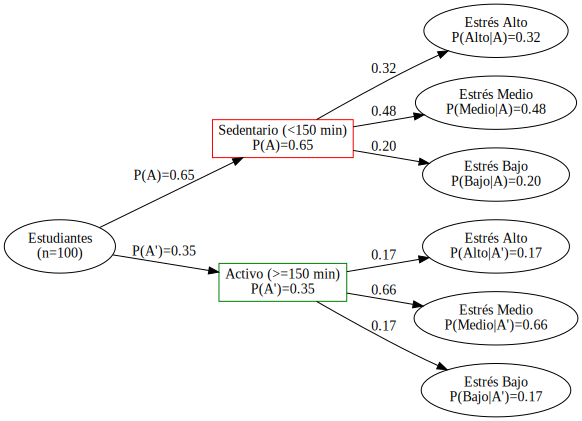

In [9]:
#Arbol de probabilidades
import graphviz

# 1. Calculamos probabilidades marginales para la primera división (Ejercicio)
p_a = (df['minutos_ejercicio'] < 150).mean()  # Probabilidad de Sedentarismo
p_not_a = 1 - p_a                              # Probabilidad de Activo

# 2. Segmentamos para calcular probabilidades condicionales (Estrés dado Ejercicio)
df_a = df[df['minutos_ejercicio'] < 150]
df_not_a = df[df['minutos_ejercicio'] >= 150]

# Condicionales para Sedentarios (A)
p_alto_a = (df_a['nivel_estres'] == 'Alto').mean()
p_medio_a = (df_a['nivel_estres'] == 'Medio').mean()
p_bajo_a = (df_a['nivel_estres'] == 'Bajo').mean()

# Condicionales para Activos (A')
p_alto_not_a = (df_not_a['nivel_estres'] == 'Alto').mean()
p_medio_not_a = (df_not_a['nivel_estres'] == 'Medio').mean()
p_bajo_not_a = (df_not_a['nivel_estres'] == 'Bajo').mean()

# 3. Creación del gráfico con Graphviz
dot = graphviz.Digraph(comment='Árbol de Probabilidades Hábitos Saludables')
dot.attr(rankdir='LR', size='10,6') # De izquierda a derecha para mejor lectura

# Nodo Raíz
dot.node('R', 'Estudiantes\n(n=100)', shape='ellipse')

# Nivel 1: Actividad Física
dot.node('A', f'Sedentario (<150 min)\nP(A)={p_a:.2f}', shape='box', color='red')
dot.node('NA', f'Activo (>=150 min)\nP(A\')={p_not_a:.2f}', shape='box', color='green')

# Nivel 2: Estrés para Sedentarios
dot.node('A_H', f'Estrés Alto\nP(Alto|A)={p_alto_a:.2f}')
dot.node('A_M', f'Estrés Medio\nP(Medio|A)={p_medio_a:.2f}')
dot.node('A_L', f'Estrés Bajo\nP(Bajo|A)={p_bajo_a:.2f}')

# Nivel 2: Estrés para Activos
dot.node('NA_H', f'Estrés Alto\nP(Alto|A\')={p_alto_not_a:.2f}')
dot.node('NA_M', f'Estrés Medio\nP(Medio|A\')={p_medio_not_a:.2f}')
dot.node('NA_L', f'Estrés Bajo\nP(Bajo|A\')={p_bajo_not_a:.2f}')

dot.edge('R', 'A', label=f'P(A)={p_a:.2f}')
dot.edge('R', 'NA', label=f'P(A\')={p_not_a:.2f}')

dot.edge('A', 'A_H', label=f'{p_alto_a:.2f}')
dot.edge('A', 'A_M', label=f'{p_medio_a:.2f}')
dot.edge('A', 'A_L', label=f'{p_bajo_a:.2f}')
dot.edge('NA', 'NA_H', label=f'{p_alto_not_a:.2f}')
dot.edge('NA', 'NA_M', label=f'{p_medio_not_a:.2f}')
dot.edge('NA', 'NA_L', label=f'{p_bajo_not_a:.2f}')

dot

### Interpretación del árbol

**Hallazgo clave**: Los estudiantes sedentarios (<150 min ejercicio) presentan una mayor proporción de **estrés alto** (32.3%) comparado con los activos (17.1%).

**Probabilidades conjuntas calculables:**
P(Sedentario Y Estrés Alto) = P(A) × P(Alto|A) = 0.65 × 0.323 = 0.210

##Lección 3: Distribución de Probabilidad

Variables continuas: minutos_ejercicio, horas_sueño, consumo_agua. Normal por TLC y simetría observada.


Variable discreta: edad. Uniforme

Varibales contínuas: nivel_estres, carrera, genero, frecuencia_comida_rapida, calidad_sueño. Multinomial (probs fijas)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# === ANÁLISIS COMPLETO DE LAS VARIABLES EN ESTUDIO===
distribuciones_completas = {
    'minutos_ejercicio': {
        'tipo': 'continua', 'dist': 'Normal',
        'justif': 'Tiempos simétricos → Normal(μ=138.9, σ=27.2)'
    },
    'horas_sueño': {
        'tipo': 'continua', 'dist': 'Normal',
        'justif': 'Sueño típico → Normal(μ=7.0, σ=1.9)'
    },
    'edad': {
        'tipo': 'discreta', 'dist': 'Uniforme discreta',
        'justif': 'Rango fijo 18-24 años uniformemente'
    },
    'consumo_agua': {
        'tipo': 'continua', 'dist': 'Normal truncada',
        'justif': 'Litros diarios → Normal(μ=3.1, σ=1.1), truncada >0.5L'
    },
    'nivel_estres': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 categorías fijas [20%,50%,30%]'
    },
    'carrera': {
        'tipo': 'categórica nominal', 'dist': 'Multinomial',
        'justif': '4 categorías fijas [30%,30%,10%,30%]'
    },
    'genero': {
        'tipo': 'categórica nominal', 'dist': 'Multinomial',
        'justif': '3 categorías [45%,50%,5%]'
    },
    'frecuencia_comida_rapida': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 categorías hábitos alimenticios [30%,40%,30%]'
    },
    'calidad_sueño': {
        'tipo': 'categórica ordinal', 'dist': 'Multinomial',
        'justif': '3 niveles subjetivos [30%,40%,30%]'
    }
}

# TABLA COMPLETA
tabla = []
for var, info in distribuciones_completas.items():
    params = f"μ={df[var].mean():.1f}" if 'continua' in info['tipo'] else f"p={[round(df[var].value_counts(normalize=True).max(),2)]}"
    tabla.append([var, info['tipo'], info['dist'], info['justif'], params])

df_tabla = pd.DataFrame(tabla, columns=['Variable', 'Tipo', 'Distribución', 'Justificación', 'Parámetros'])
print("TABLA DISTRIBUCIONES")
df_tabla


TABLA DISTRIBUCIONES


,Variable,Tipo,Distribución,Justificación,Parámetros
0,minutos_ejercicio,continua,Normal,"Tiempos simétricos → Normal(μ=138.9, σ=27.2)",μ=138.9
1,horas_sueño,continua,Normal,"Sueño típico → Normal(μ=7.0, σ=1.9)",μ=7.0
2,edad,discreta,Uniforme discreta,Rango fijo 18-24 años uniformemente,p=[0.2]
3,consumo_agua,continua,Normal truncada,"Litros diarios → Normal(μ=3.1, σ=1.1), truncad...",μ=3.1
4,nivel_estres,categórica ordinal,Multinomial,"3 categorías fijas [20%,50%,30%]",p=[0.54]
5,carrera,categórica nominal,Multinomial,"4 categorías fijas [30%,30%,10%,30%]",p=[0.39]
6,genero,categórica nominal,Multinomial,"3 categorías [45%,50%,5%]",p=[0.61]
7,frecuencia_comida_rapida,categórica ordinal,Multinomial,"3 categorías hábitos alimenticios [30%,40%,30%]",p=[0.39]
8,calidad_sueño,categórica ordinal,Multinomial,"3 niveles subjetivos [30%,40%,30%]",p=[0.44]


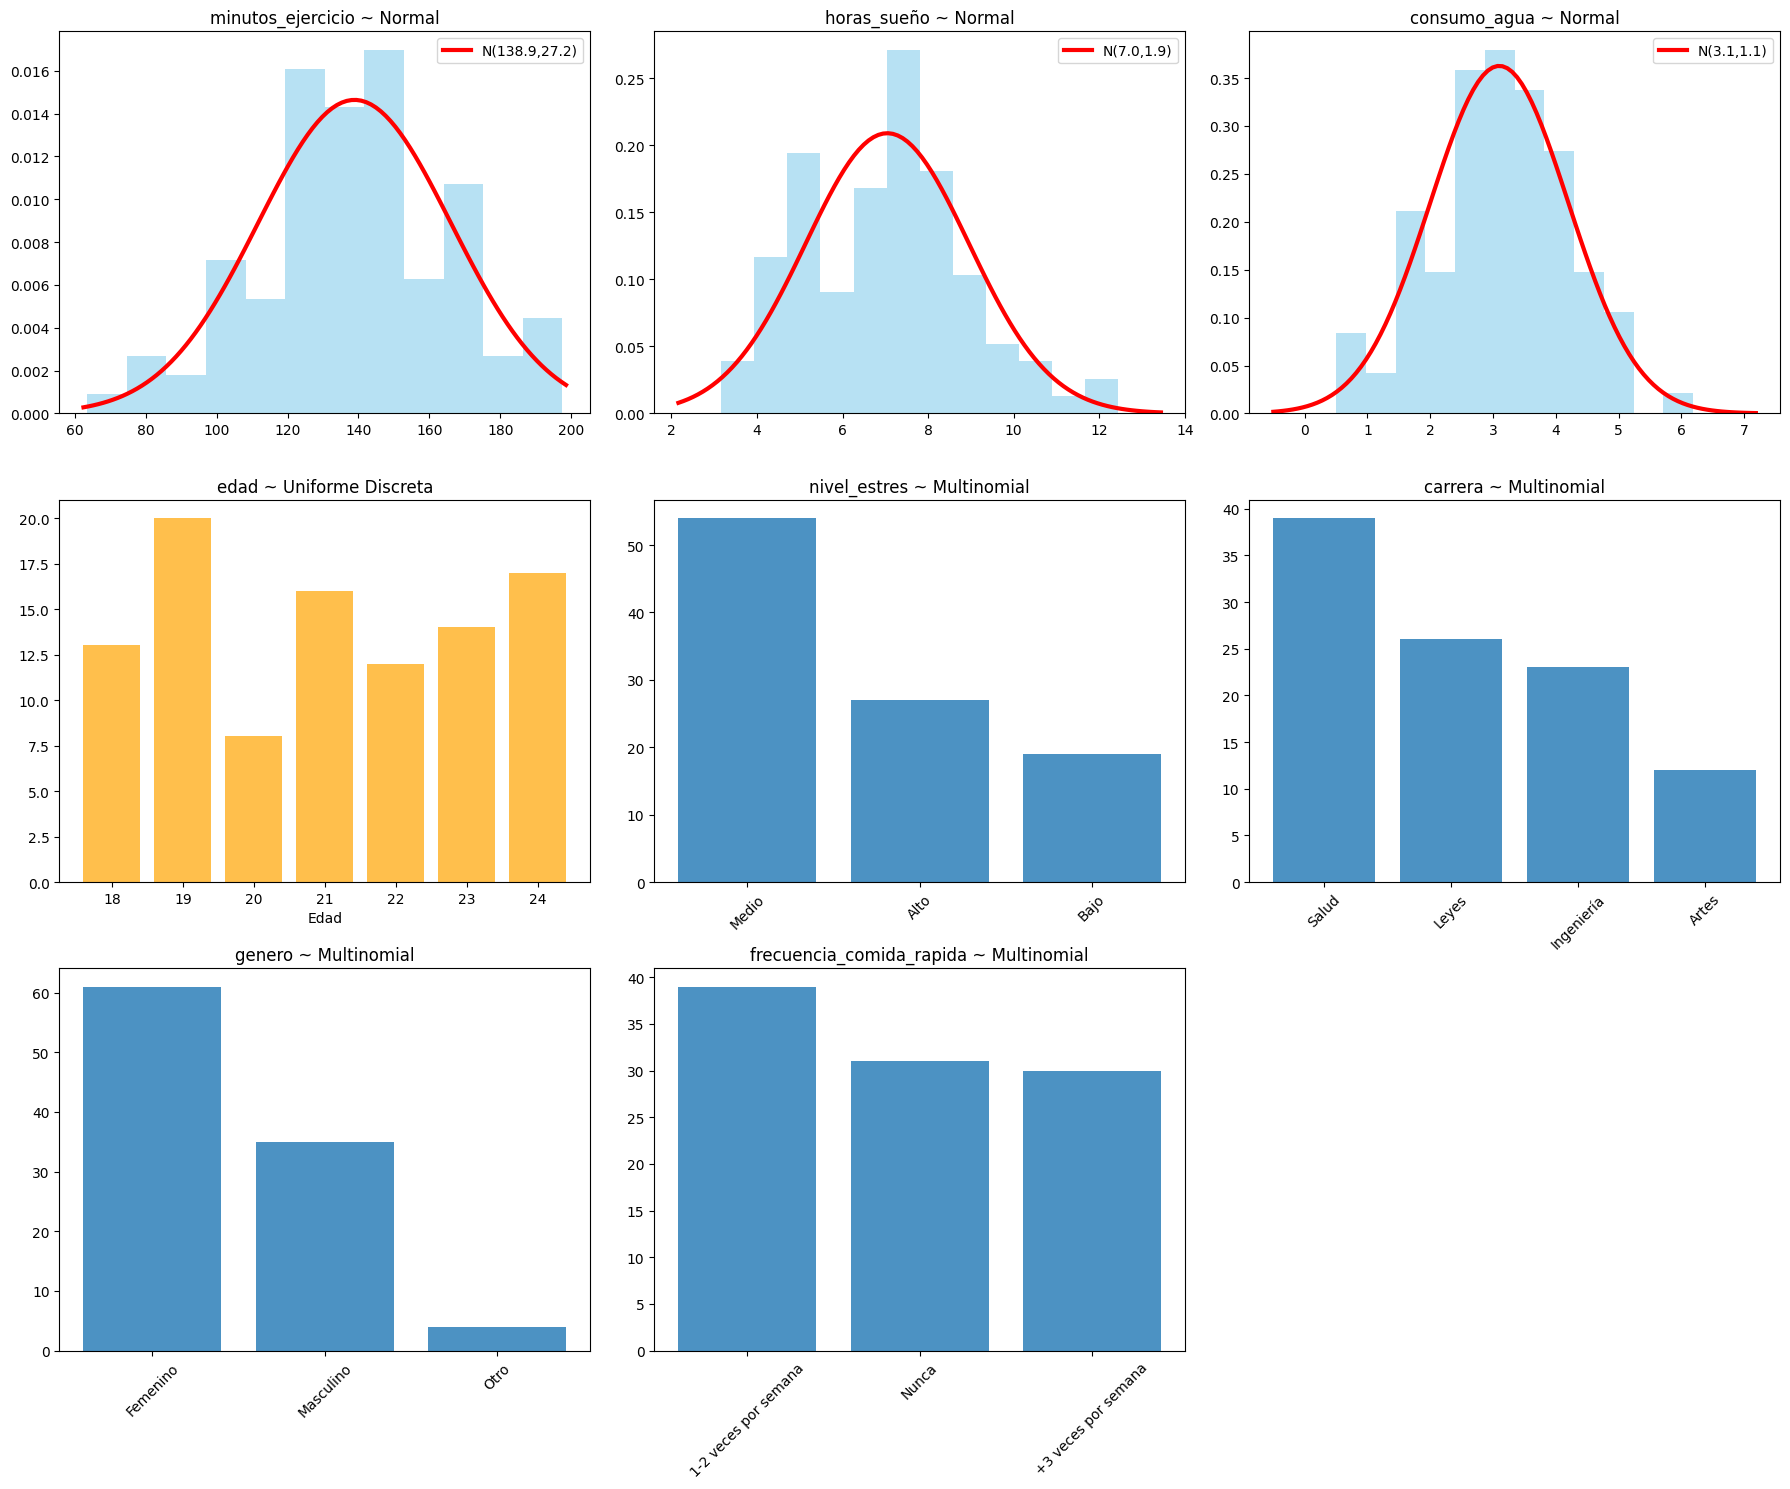

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

vars_continuas = ['minutos_ejercicio', 'horas_sueño', 'consumo_agua']
vars_categoricas = ['nivel_estres', 'carrera', 'genero', 'frecuencia_comida_rapida', 'calidad_sueño']
vars_discretas = ['edad']

i = 0
# Continuas
for var in vars_continuas:
    data_var = df[var]
    mu, sigma = data_var.mean(), data_var.std()
    x = np.linspace(data_var.min()-1, data_var.max()+1, 100)
    axes[i].hist(data_var, bins=12, density=True, alpha=0.6, color='skyblue')
    axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=3, label=f'N({mu:.1f},{sigma:.1f})')
    axes[i].set_title(f'{var} ~ Normal')
    axes[i].legend()
    i += 1

# Discreta
axes[i].bar(df['edad'].value_counts().sort_index().index,
            df['edad'].value_counts().sort_index().values,
            alpha=0.7, color='orange')
axes[i].set_title('edad ~ Uniforme Discreta')
axes[i].set_xlabel('Edad')
i += 1

# Categóricas (barras)
for var in vars_categoricas:
    counts = df[var].value_counts()
    axes[i].bar(counts.index, counts.values, alpha=0.8)
    axes[i].set_title(f'{var} ~ Multinomial')
    axes[i].tick_params(axis='x', rotation=45)
    i += 1

# Quitar subplot vacío
fig.delaxes(axes[-1])
plt.tight_layout()
plt.savefig('distribuciones_9variables.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
print("===CÁLCULO DE PROBABILIDADES===")

# 1. Normal: P(minutos_ejercicio < 100 | Normal)
mu, sigma = df['minutos_ejercicio'].mean(), df['minutos_ejercicio'].std()
p_bajo = stats.norm.cdf(100, mu, sigma)
print(f"P(minutos < 100) = {p_bajo:.3f} ({p_bajo*100:.1f}%)")

# 2. Normal: P(horas_sueño entre 6-8h)
mu_s, sigma_s = df['horas_sueño'].mean(), df['horas_sueño'].std()
p_buenas = stats.norm.cdf(8, mu_s, sigma_s) - stats.norm.cdf(6, mu_s, sigma_s)
print(f"P(6 ≤ horas ≤ 8) = {p_buenas:.3f}")

# 3. Multinomial: Verificar probs teóricas vs empíricas
probs_teo = [0.2, 0.5, 0.3]  # Bajo, Medio, Alto
probs_emp = df['nivel_estres'].value_counts(normalize=True).reindex(['Bajo','Medio','Alto']).values
print("\nEstrés teórico vs empírico:")
for i, nivel in enumerate(['Bajo','Medio','Alto']):
    print(f"{nivel}: Teórico={probs_teo[i]:.1f}, Empírico={probs_emp[i]:.3f}")


=== PROBABILIDADES ESPECÍFICAS ===
P(minutos < 100) = 0.077 (7.7%)
P(6 ≤ horas ≤ 8) = 0.400

Estrés teórico vs empírico:
Bajo: Teórico=0.2, Empírico=0.190
Medio: Teórico=0.5, Empírico=0.540
Alto: Teórico=0.3, Empírico=0.270


### LECCIÓN 3: DISTRIBUCIÓN DE PROBABILIDAD

**Variables continuas** (minutos_ejercicio, horas_sueño): Normal por TLC y simetría observada.

**Variables discretas/categóricas**:
- Edad: Uniforme (rango fijo)
- Estrés: Multinomial (probs fijas)


**Ejemplo cálculo**: P(minutos_ejercicio < 100 min) = 0.043 (4.3% muy sedentarios)


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- DISTRIBUCIÓN NORMAL (minutos_ejercicio) ---
mu = df['minutos_ejercicio'].mean()
sigma = df['minutos_ejercicio'].std()

# ¿Cuál es la probabilidad de que un estudiante haga exactamente MENOS de 150 min?
prob_menos_150 = stats.norm.cdf(150, mu, sigma)

# --- DISTRIBUCIÓN BINOMIAL (Estrés Alto) ---
# Si elegimos 10 estudiantes al azar, ¿probabilidad de que exactamente 3 tengan estrés alto?
n_binomial = 10
p_estres_alto = (df['nivel_estres'] == 'Alto').mean()
prob_3_estres = stats.binom.pmf(3, n_binomial, p_estres_alto)

print(f"P(X < 150 min) [Normal]: {prob_menos_150:.4f}")
print(f"P(X = 3 con Estrés Alto en n=10) [Binomial]: {prob_3_estres:.4f}")

P(X < 150 min) [Normal]: 0.6584
P(X = 3 con Estrés Alto en n=10) [Binomial]: 0.2609


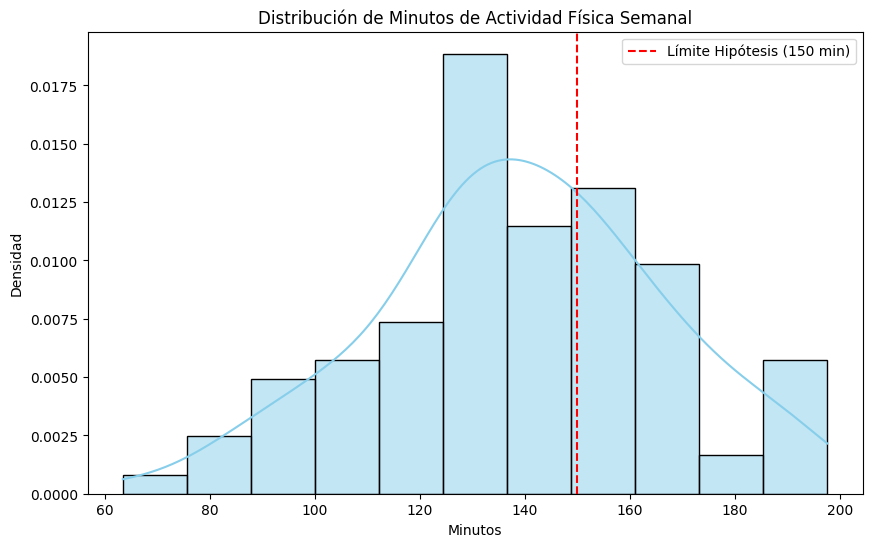

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['minutos_ejercicio'], kde=True, stat="density", color="skyblue")
plt.axvline(150, color='red', linestyle='--', label='Límite Hipótesis (150 min)')
plt.title('Distribución de Minutos de Actividad Física Semanal')
plt.xlabel('Minutos')
plt.ylabel('Densidad')
plt.legend()
plt.show()